In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [ ]:
from google.colab import files
file_uploaded=files.upload()

In [10]:
import matplotlib.pyplot as plt

In [94]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font',family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

## **문제1) 가장 무더웠던 날이 언제이며, 이날의 평균 기온, 평균 풍속, 최대 풍속을 구하시오.**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mat

In [ ]:
df = pd.read_csv('weather.csv', encoding = 'CP949')

In [18]:
print("평균 풍속의 최소값은 : ", df['평균풍속'].min(),"m/s 입니다.")

평균 풍속의 최소값은 :  0.2 m/s 입니다.


In [29]:
df2=df.dropna(how = 'any')

In [51]:
hot = df2['평균기온'].max()
wind = df2['평균풍속'].max()
strongWind = df2['최대풍속'].max()

In [46]:
hotday = df2['일시'][df2['평균기온'] == hot]
hotday

1103    2013-08-08
Name: 일시, dtype: object

In [52]:
print(f"가장 무더웠던날은 {hotday[1103]}이며 그 날의 기온은 {hot}도, 평균 풍속은 {wind}, 최대 풍속은 {strongWind} 이었습니다.")

가장 무더웠던날은 2013-08-08이며 그 날의 기온은 31.3도, 평균 풍속은 14.9, 최대 풍속은 26.0 이었습니다.


## **문제2) 울릉도의 평균 기온이 30도가 넘는 날을 찾아, 이날의 기상데이터를 나열해 보세요.**

In [63]:
hottest= df2.loc[df2['평균기온']>=30]
hottest

,일시,평균기온,최대풍속,평균풍속
1103,2013-08-08,31.3,7.8,4.6
1104,2013-08-09,30.6,9.9,6.4
1105,2013-08-10,30.6,7.4,3.8
2913,2018-07-23,30.5,6.5,1.6
2925,2018-08-04,30.3,5.8,3.0


## **문제3) 울릉도는 몇월에 가장 바람이 강할까? (막대그래프로 출력)**

In [68]:
df2['일시'].str[5:7] #월
df2['월'] = df2['일시'].str[5:7] #월 field 추가

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,일시,평균기온,최대풍속,평균풍속,월
0,2010-08-01,28.7,8.3,3.4,08
1,2010-08-02,25.2,8.7,3.8,08
2,2010-08-03,22.1,6.3,2.9,08
3,2010-08-04,25.3,6.6,4.2,08
4,2010-08-05,27.2,9.1,5.6,08
...,...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7,07
3649,2020-07-28,21.9,4.5,1.6,07
3650,2020-07-29,21.6,3.2,1.0,07
3651,2020-07-30,22.9,9.7,2.4,07


In [71]:
#월 별로 묶어보기
df2.groupby('월')['평균풍속'].mean()
re=df2.groupby('월')['평균풍속'].mean()

In [76]:
re2 = re.index[re == re.max()]
print(f"울릉도는 {re2[0]}월에 가장 바람이 강합니다.")

울릉도는 04월에 가장 바람이 강합니다.


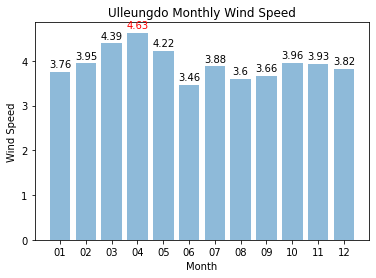

In [107]:
# x : 월
# y : 평균풍속

x = re.index.tolist()
y = re.tolist()

plt.bar(x, y, alpha=0.5)
plt.rc('font',family='NanumBarunGothic')

plt.title('Ulleungdo Monthly Wind Speed')
plt.xlabel('Month')
plt.ylabel('Wind Speed')

for i in range(0,len(x)):
    if re.max() == y[i]:
        plt.text(i, y[i] + 0.1, round(y[i],2), ha='center', color='red')
    else:
        plt.text(i, y[i] + 0.1, round(y[i],2), ha='center')

plt.show()